In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,NaN,72.61,NaN,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2
float64		column 2	1
float64		column 3	1
float64		column 4	1
float64		column 5	1
float64		column 6	5
float64		column 7	5
float64		column 8	2
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,212.000000,213.000000,213.000000,213.000000,213.000000,209.000000,209.000000,212.000000,214.000000
mean,1.518386,13.401549,2.697136,1.438169,72.649202,0.498134,8.935885,0.176698,0.057009
std,0.003043,0.813296,1.433946,0.490597,0.775955,0.658019,1.405068,0.499277,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516528,12.900000,2.190000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517685,13.300000,3.480000,1.360000,72.790000,0.550000,8.600000,0.000000,0.000000
75%,1.519165,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

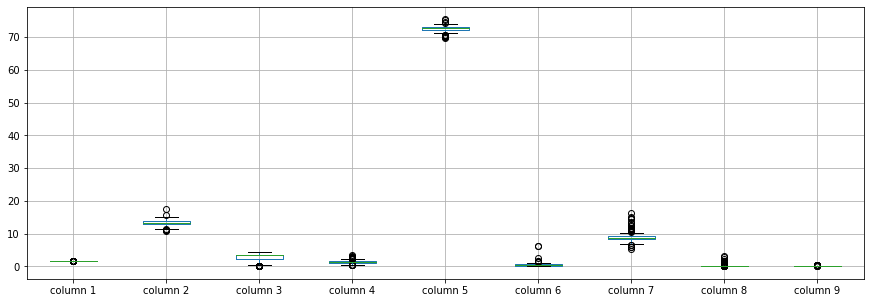

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518386
column 2    13.401549
column 3     2.697136
column 4     1.438169
column 5    72.649202
column 6     0.498134
column 7     8.935885
column 8     0.176698
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.184004,-0.137448,-0.400442,-0.540101,-0.306450,0.812733,0.009365,0.139691
column 2,-0.184004,1.000000,-0.256839,0.140221,-0.074015,-0.254670,-0.250893,0.311237,-0.244772
column 3,-0.137448,-0.256839,1.000000,-0.463692,-0.156631,-0.010658,-0.432146,-0.486933,0.078631
column 4,-0.400442,0.140221,-0.463692,1.000000,-0.007510,0.355690,-0.292288,0.469605,-0.067859
column 5,-0.540101,-0.074015,-0.156631,-0.007510,1.000000,-0.191785,-0.210646,-0.109694,-0.094794
column 6,-0.306450,-0.254670,-0.010658,0.355690,-0.191785,1.000000,-0.335412,-0.031488,-0.020627
column 7,0.812733,-0.250893,-0.432146,-0.292288,-0.210646,-0.335412,1.000000,-0.110454,0.097040
column 8,0.009365,0.311237,-0.486933,0.469605,-0.109694,-0.031488,-0.110454,1.000000,-0.057335
column 9,0.139691,-0.244772,0.078631,-0.067859,-0.094794,-0.020627,0.097040,-0.057335,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+19,9+19+19,9+19+19+19,9+19+19+19+19,9+19+19+19+19+19,9+19+19+19+19+19+19,9+19+19+19+19+19,9+19+19+19+19,9+19+19+19,9+19+19,9+19,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=70)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 101.78345489501953
Epoch: 1 , loss: 101.84658109224759
Epoch: 2 , loss: 101.73397005521335
Epoch: 3 , loss: 101.77085817777194
Epoch: 4 , loss: 102.08836012620192
Epoch: 5 , loss: 101.72340393066406
Epoch: 6 , loss: 101.69789945162259
Epoch: 7 , loss: 101.65573237492488
Epoch: 8 , loss: 101.68422229473407
Epoch: 9 , loss: 101.66123610276442
Epoch: 10 , loss: 101.60066340519832
Epoch: 11 , loss: 101.70079979529747
Epoch: 12 , loss: 101.63302964430589
Epoch: 13 , loss: 101.6741209763747
Epoch: 14 , loss: 101.59480403019832
Epoch: 15 , loss: 101.64487633338341
Epoch: 16 , loss: 101.63039163442758
Epoch: 17 , loss: 101.62824425330528
Epoch: 18 , loss: 101.68502748929538
Epoch: 19 , loss: 101.59261145958534
Epoch: 20 , loss: 101.6550785945012
Epoch: 21 , loss: 101.64277824988731
Epoch: 22 , loss: 101.67564157339243
Epoch: 23 , loss: 101.63092275766226
Epoch: 24 , loss: 101.65990154559796
Epoch: 25 , loss: 10

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.0,0.000000,-2.851725,0.0,-0.052243,0.0,0.0,0.0
210,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
211,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
212,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(77.82759158822991, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.07137291221334373

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.64,4.490000,1.100000,71.78,0.060000,8.75,0.00,0.0
1,1.517610,13.89,3.600000,1.360000,72.73,0.480000,7.83,0.00,0.0
2,1.516180,13.53,3.550000,1.540000,72.99,0.390000,7.78,0.00,0.0
3,1.517660,13.21,3.690000,1.290000,72.61,0.570000,8.22,0.00,0.0
4,1.517420,13.27,3.620000,1.240000,73.08,0.550000,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.14,0.000000,0.028275,72.61,0.027757,9.18,1.06,0.0
210,1.516850,14.92,0.000000,1.990000,73.06,0.000000,8.40,1.59,0.0
211,1.520650,14.36,0.000000,2.020000,73.42,0.000000,8.44,1.64,0.0
212,1.516510,14.38,0.000000,1.940000,73.61,0.000000,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_AG_1(imp).xlsx", index=False, header=False)